In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\manev\Desktop\proj'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\manev\Desktop\proj\fruit-vegetable-recognition-calories-counter.ipynb
C:\Users\manev\Desktop\proj\test\apple\Image_1.jpg
C:\Users\manev\Desktop\proj\test\apple\Image_10.jpg
C:\Users\manev\Desktop\proj\test\apple\Image_2.jpg
C:\Users\manev\Desktop\proj\test\apple\Image_3.jpg
C:\Users\manev\Desktop\proj\test\apple\Image_4.jpg
C:\Users\manev\Desktop\proj\test\apple\Image_5.jpg
C:\Users\manev\Desktop\proj\test\apple\Image_6.JPG
C:\Users\manev\Desktop\proj\test\apple\Image_7.jpg
C:\Users\manev\Desktop\proj\test\apple\Image_8.jpg
C:\Users\manev\Desktop\proj\test\apple\Image_9.jpg
C:\Users\manev\Desktop\proj\test\banana\Image_1.jpg
C:\Users\manev\Desktop\proj\test\banana\Image_10.jpg
C:\Users\manev\Desktop\proj\test\banana\Image_2.jpg
C:\Users\manev\Desktop\proj\test\banana\Image_3.jpg
C:\Users\manev\Desktop\proj\test\banana\Image_4.jpg
C:\Users\manev\Desktop\proj\test\banana\Image_5.jpg
C:\Users\manev\Desktop\proj\test\banana\Image_6.jpg
C:\Users\manev\Desktop\proj\test\banana\Image

In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.10.0


In [8]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True';

In [9]:
# Create a list with the filepaths for training and testing
train_dir = Path('C:/Users/manev/Desktop/proj/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [10]:
test_dir = Path('C:/Users/manev/Desktop/proj/test')
test_filepaths = list(test_dir.glob(r'*/*.jpg'))

In [11]:
val_dir = Path('C:/Users/manev/Desktop/proj/validation')
val_filepaths = list(val_dir.glob(r'*/*.jpg'))


In [12]:


def image_processing(filepaths):
    """ Create a DataFrame with the filepaths and the labels of the pictures
    """

    # Extract labels from file paths
    labels = [str(filepath).split("\\")[-2] for filepath in filepaths]

    # Create Series for file paths and labels
    filepath_series = pd.Series(filepaths, name='Filepath').astype(str)
    labels_series = pd.Series(labels, name='Label')

    # Concatenate file paths and labels into a DataFrame
    df = pd.concat([filepath_series, labels_series], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df


In [13]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [14]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')


-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['pineapple' 'ginger' 'pomegranate' 'raddish' 'grapes' 'paprika'
 'sweetcorn' 'bell pepper' 'turnip' 'eggplant' 'watermelon' 'garlic'
 'capsicum' 'spinach' 'cauliflower' 'tomato' 'peas' 'carrot' 'lemon'
 'potato' 'banana' 'mango' 'kiwi' 'beetroot' 'apple' 'cabbage'
 'sweetpotato' 'orange' 'pear' 'onion' 'lettuce' 'chilli pepper'
 'cucumber' 'soy beans' 'corn' 'jalepeno']


In [15]:
train_df.head(5)

,Filepath,Label
0,C:\Users\manev\Desktop\proj\train\pineapple\Im...,pineapple
1,C:\Users\manev\Desktop\proj\train\ginger\Image...,ginger
2,C:\Users\manev\Desktop\proj\train\pomegranate\...,pomegranate
3,C:\Users\manev\Desktop\proj\train\raddish\Imag...,raddish
4,C:\Users\manev\Desktop\proj\train\grapes\Image...,grapes


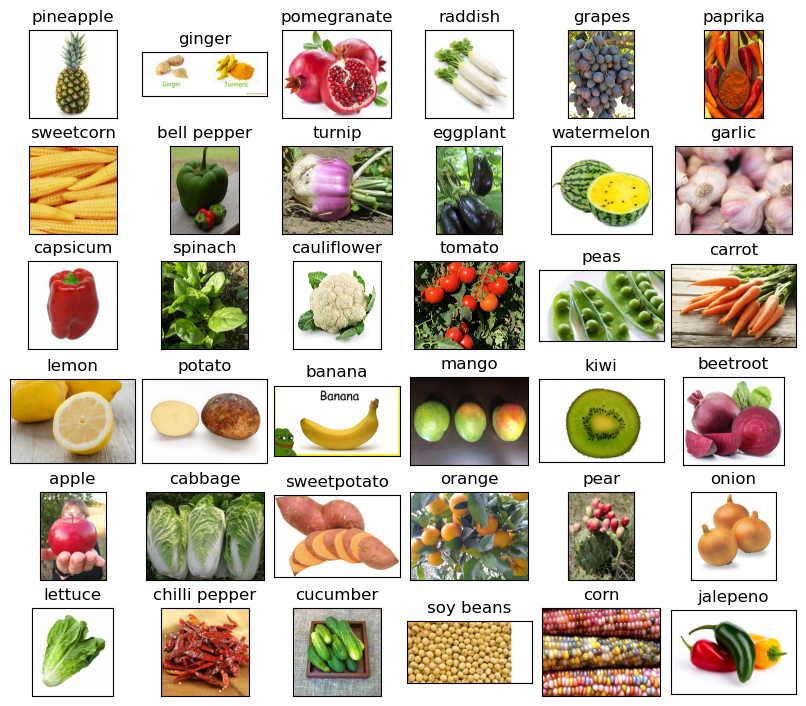

In [16]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [17]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [18]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [19]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [20]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [21]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False


9406464/9406464 [==============================] - 1s 0us/step


In [22]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [23]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
90/90 [==============================] - 195s 2s/step - loss: 1.7776 - accuracy: 0.5359 - val_loss: 0.5158 - val_accuracy: 0.8412
Epoch 2/5
90/90 [==============================] - 168s 2s/step - loss: 0.5658 - accuracy: 0.8287 - val_loss: 0.2559 - val_accuracy: 0.9294
Epoch 3/5
90/90 [==============================] - 153s 2s/step - loss: 0.3420 - accuracy: 0.8946 - val_loss: 0.2164 - val_accuracy: 0.9412
Epoch 4/5
90/90 [==============================] - 159s 2s/step - loss: 0.2063 - accuracy: 0.9387 - val_loss: 0.1743 - val_accuracy: 0.9441
Epoch 5/5
90/90 [==============================] - 157s 2s/step - loss: 0.1390 - accuracy: 0.9545 - val_loss: 0.2020 - val_accuracy: 0.9294


In [24]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 28s 3s/step


['cabbage',
 'chilli pepper',
 'pomegranate',
 'pomegranate',
 'carrot',
 'mango',
 'garlic',
 'potato',
 'turnip',
 'garlic',
 'peas',
 'mango',
 'cucumber',
 'spinach',
 'pineapple',
 'onion',
 'mango',
 'bell pepper',
 'cucumber',
 'cabbage',
 'sweetcorn',
 'tomato',
 'carrot',
 'raddish',
 'pear',
 'bell pepper',
 'carrot',
 'turnip',
 'kiwi',
 'pineapple',
 'spinach',
 'pineapple',
 'sweetpotato',
 'pear',
 'paprika',
 'lemon',
 'pear',
 'bell pepper',
 'chilli pepper',
 'watermelon',
 'tomato',
 'soy beans',
 'beetroot',
 'lettuce',
 'chilli pepper',
 'pomegranate',
 'cauliflower',
 'turnip',
 'spinach',
 'carrot',
 'paprika',
 'sweetpotato',
 'chilli pepper',
 'apple',
 'apple',
 'grapes',
 'onion',
 'watermelon',
 'bell pepper',
 'soy beans',
 'potato',
 'soy beans',
 'onion',
 'turnip',
 'turnip',
 'lemon',
 'lettuce',
 'carrot',
 'jalepeno',
 'peas',
 'cauliflower',
 'grapes',
 'bell pepper',
 'pear',
 'capsicum',
 'watermelon',
 'cabbage',
 'banana',
 'eggplant',
 'bell pepp

In [27]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [28]:
img = output('C:/Users/manev/Desktop/proj/test/cabbage/Image_1.jpg')
img

1/1 [==============================] - 1s 1s/step


'cabbage'

In [29]:
model.save('FV.h5')